<a href="https://colab.research.google.com/github/Wazifak/Wazifak/blob/main/netflix_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df = pd.read_csv("/content/netflix_titles.csv")

In [4]:
df.shape

(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [9]:
#Data Cleaning
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['type'] = df['type'].astype('category')

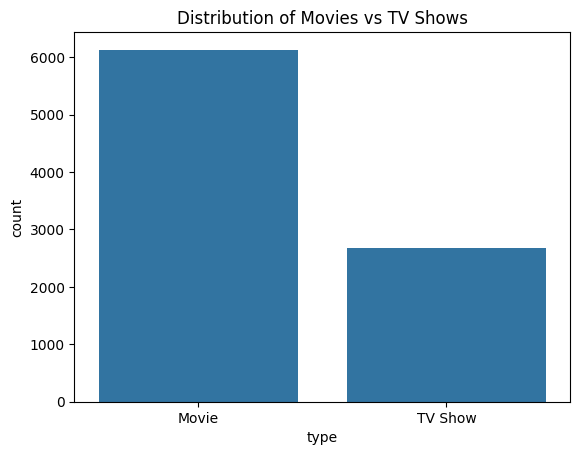

In [10]:
#Content Type Distribution
sns.countplot(data=df, x='type')
plt.title("Distribution of Movies vs TV Shows")
plt.show()

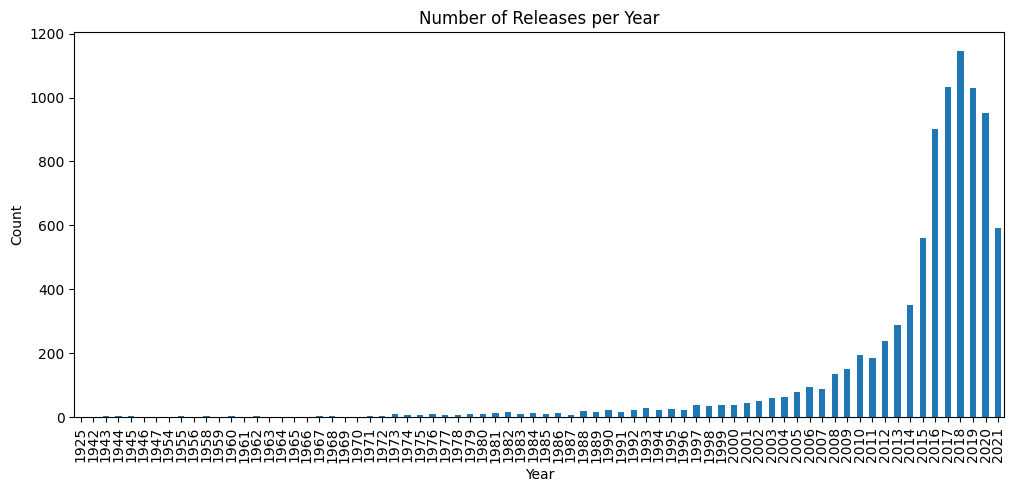

In [11]:
# Releases Over the Years
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

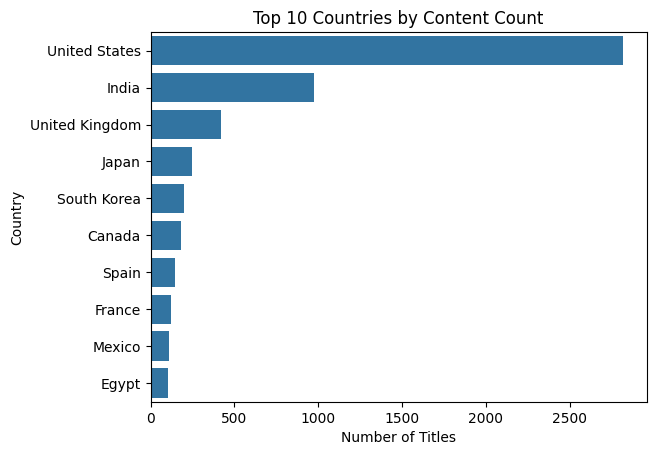

In [12]:
# Top Countries Producing Content
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 10 Countries by Content Count")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

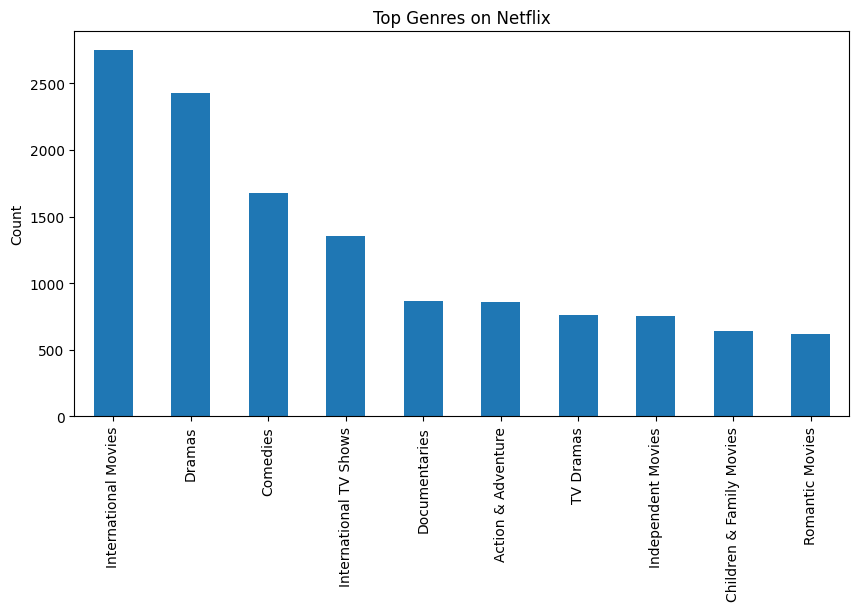

In [13]:
#Top Genres (from 'listed_in')
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
genres.plot(kind='bar', title='Top Genres on Netflix', figsize=(10,5))
plt.ylabel("Count")
plt.show()